In [55]:
## imports the table of genes
import numpy as np
import pandas as pd
dna_sequences = pd.read_csv('selectedgenes.csv', delimiter=',')
dna_sequences

,gene,baseMean,log2FC,log2FCunshrunk,pvalue,padj,logpv,significance,introns
0,ninaE,87351.6,-0.71,-0.85,4.684020e-04,0.029429,3.329381,y,GTGAGTCCTTGAAATGGTAAACCTTCTGGGAACCCATTTTTTAAAA...
1,ninaG,221.0,-1.17,-1.76,6.878190e-06,0.001263,5.162526,y,GTAAGAAGAGAGCTAATCCTCTGCGCTGGCGCTTACCAAACTCCTCAG
2,Hsc70-3,6189.1,-0.86,-0.94,6.134050e-08,0.000024,7.212253,y,GTAAGTTAGATATGCTCGTCCTTCGGCTCTAAAACCCATTAATGCT...
3,dnr1,9011.6,-1.03,-1.16,5.530670e-09,0.000003,8.257222,y,GTGAGTTGTCTCTGCAGCCTTGTGCTCCCATTGAATCCTTACTAAC...
4,Cnx99A,3644.3,-1.23,-1.51,1.282870e-08,0.000006,7.891817,y,GTAATGATGCTCGAGCTTTCACTTGAGATCTTCATAAGGAATTTAC...


In [56]:
## choses dictionary with pfm for code 
print('Input transcription factor name')
factor = input()
if factor.upper() == 'ATF4':
    profile = {'A': [210, 169, 639, 0, 19, 888, 2, 1, 40, 879, 888, 0, 414], 'C': [71, 117, 202, 0, 0, 0, 372, 0, 838, 21, 3, 266, 272], 'G': [442, 409, 127, 7, 1090, 0, 9, 1104, 16, 0, 1, 62, 101], 'T': [170, 213, 3, 981, 11, 25, 470, 4, 113, 3, 4, 714, 78]}
elif factor.upper() == 'XBP1':
    profile = {'A': [4396, 3270, 1104, 974, 3699, 167, 7840, 9, 52, 0, 380, 8004, 230, 989], 'C': [558, 1017, 1191, 367, 3809, 7169, 17, 7356, 0, 16, 7264, 48, 2273, 6313], 'G': [801, 2413, 2669, 9168, 59, 222, 276, 2, 11353, 8, 47, 173, 3157, 1217], 'T': [2467, 1780, 3999, 2321, 247, 442, 118, 10, 10, 9107, 35, 92, 6389, 1250]}
## elif factor.upper() =='ATF6':
    ## profile = {'A': [], 'C': [], 'G': [], 'T': []}
    ## cannot find transcription factor
## allows user to input transcription factor 
else:
    print('Enter position frequency matrix scores for A in the format 3 4 5:')
    item1 = [int(x) for x in input().split()]
    print('Enter position frequency matrix scores for C in the format 3 4 5:')
    item2 = [int(x) for x in input().split()]
    print('Enter position frequency matrix scores for G in the format 3 4 5:')
    item3 = [int(x) for x in input().split()]
    print('Enter position frequency matrix scores for T in the format 3 4 5:')
    item4 = [int(x) for x in input().split()]
    profile = {'A':item1, 'C': item2, 'G': item3, 'T': item4}

Input transcription factor name
xbp1


RESULTS



Gene:  ninaE


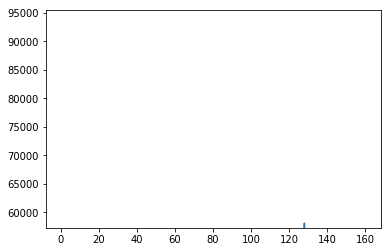

ATT: 58076

 gtgagtccttgaaatggtaaaccttctgggaacccATTttttaaaaaatgatcaaagctactatatacaaatgtttaaaaacttaaATTacaaacaaaaggtttacaaATTacaATTgtATTaatATTATTaccacctaacATTatcctataaatatatATTcttaatctaaaag 

Gene:  ninaG


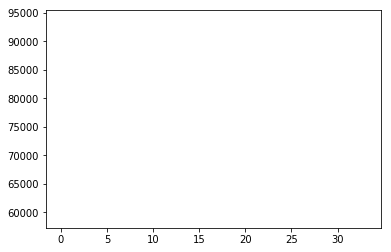

Gene:  Hsc70-3


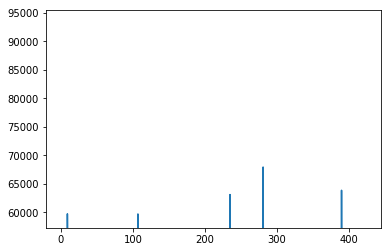

ATA: 59714

 gtaagttagATAtgctcgtccttcggctctaaaacccattaatgcttacttgagATAtcttgatcATAaagtATAcagtggtcATAaattctactgttgattttcgtaATAccaagtttttatgctttagacgtgtacatttcaaattgatcacatttATAacaaaATAtttgtaaagtagatttgaccttaaaATAacgtaaaaagaatgtATAagattttacttcttaaaaaATAggtgactttatctATActcccATActtgtaattttagctgacacacttccacgtgcgcattATAATAagaaatttttgctgtagttaagcgcctcaaattcaagtttatcagtactcaacttgtagATAggtatctctaccactgctttcatttacgattcgttattaatctaaATAtttcttacccaaattctcttacag 

AAT: 59692

 gtaagttagatatgctcgtccttcggctctaaaacccattAATgcttacttgagatatcttgatcataaagtatacagtggtcataAATtctactgttgattttcgtAATaccaagtttttatgctttagacgtgtacatttcaAATtgatcacatttataacaaAATatttgtaaagtagatttgaccttaaAATaacgtaaaaagAATgtataagattttacttcttaaaaAATaggtgactttatctatactcccatacttgtAATtttagctgacacacttccacgtgcgcattatAATaagaAATttttgctgtagttaagcgcctcaAATtcaagtttatcagtactcaacttgtagataggtatctctaccactgctttcatttacgattcgttattAATctaAATatttcttacccaAATtctcttacag 

TAG: 63097

 gtaagtTAGatatgctcgtccttcggctctaaaacccattaatgcttacttgagatatcttgatcataaagtatacagt

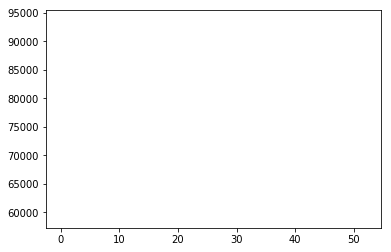

Gene:  Cnx99A


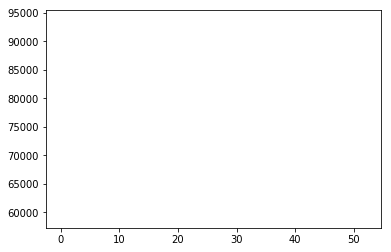

In [57]:
from colorama import Fore
from colorama import Style
print(Fore.YELLOW + '\033[5m' + 'RESULTS' + '\n' + '\n' + '\n')
## goes through DNA sequences in data frame and analyzes each
for i in range(len(dna_sequences.introns)):
    DNA = dna_sequences.introns[i].lower()
    print(Fore.BLUE + '\033[5m' + 'Gene: ', dna_sequences.gene[i])
    ## reads DNA sequence, creates scores for each
    def transcription_factor (seq, profile):
        width = len(profile['T'])
        bindingscore = []
        for i in range(len(seq)-width):
            score = 0
            for j in range(width):
                letter = seq[i+j]
                score += profile [letter][j]
            bindingscore.append (score)
        return bindingscore
    ## plots top binding scores
    upperseq = DNA.upper()
    bindingscores = transcription_factor(upperseq, profile)
    from matplotlib import pyplot
    max_binding_list = []
    for i in range(len(profile['A'])):
        my_list = []
        my_list.append(profile['A'][i])
        my_list.append(profile['C'][i])
        my_list.append(profile['G'][i])
        my_list.append(profile['T'][i])
        max_binding_list.append(max(my_list))
    pyplot.plot (bindingscores)
    max_score = sum(max_binding_list)
    pyplot.ylim (0.60 * max_score, max_score)
    pyplot.show()
    import re
    sites = []
    ## presents binding site information 
    for i in range (len(bindingscores)):
        if bindingscores[i] > 0.60 * max_score: 
            sequence = DNA[i:i + len(item1)]
            pair = sequence.upper() + ': ' + str(bindingscores[i])
            print(pair)
            sites.append(sequence)
            for i in range (len(sites)):
                visual = re.sub(sites[i], Fore.RED + '\033[1m' + sites[i].upper () +  '\033[0m' + Style.RESET_ALL, DNA)
            print('\n', visual, '\n')
